In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

mat = nx.Material.Template(nx.lib.material.Fe_enriched)

site = nx.Hyperfine(magnetic_field = 33)

mat.hyperfine_sites = [site]

layer = nx.Layer(id = "my iron oxide layer",
                 thickness = 1000,  # in nanometer
                 material = mat,
                 roughness = 30,
                 thickness_fwhm = 50)

sample = nx.Sample(layers = [layer],
                   geometry = "f")

detuning = [0]

matrix = sample.ObjectMatrix(nx.lib.moessbauer.Fe57, detuning, True)

print(np.squeeze(matrix))

matrix = sample.SampleMatrix(nx.lib.moessbauer.Fe57, detuning)

print(np.squeeze(matrix))

[[-0.69665446+0.67094952j  0.04236449-0.04080134j]
 [-0.04236449+0.04080134j -0.69665446+0.67094952j]]
[[-0.69665446+0.67094952j  0.04236449-0.04080134j]
 [-0.04236449+0.04080134j -0.69665446+0.67094952j]]


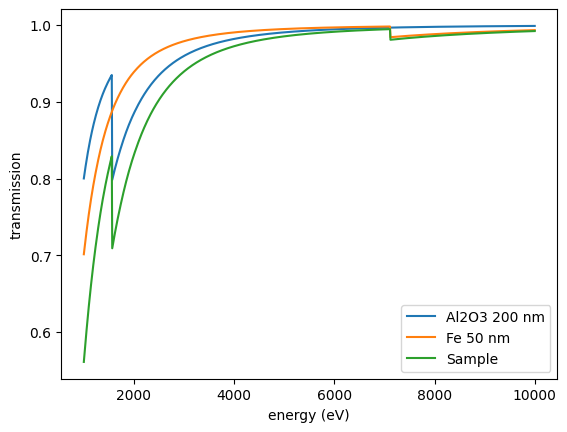

In [2]:
    layer_Al2O3= nx.Layer(thickness = 200,
                     material = nx.Material.Template(nx.lib.material.Al2O3))

    layer_Fe = nx.Layer(thickness = 50,
                     material = nx.Material.Template(nx.lib.material.Fe))

    sample = nx.Sample(layers = [layer_Al2O3, layer_Fe],
                       geometry = "f")

    energies = np.linspace(1000, 10000, 1001)

    trans_Al2O3 = []
    trans_Fe = []
    trans_sample = []

    for elem in energies:
        trans_Al2O3.append(layer_Al2O3.ElectronicForwardTransmission(elem))
        trans_Fe.append(layer_Fe.ElectronicForwardTransmission(elem))
        #trans_sample.append(sample.ElectronicForwardTransmission(elem))
        trans_sample.append(sample.ElectronicTransmission(elem))
        
    plt.plot(energies, trans_Al2O3, label = "Al2O3 200 nm")
    plt.plot(energies, trans_Fe, label = "Fe 50 nm")   
    plt.plot(energies, trans_sample, label = "Sample")
    plt.xlabel("energy (eV)")
    plt.ylabel("transmission")
    plt.legend()
    plt.show()